##### 1. Confusion Matrix
- target의 원래 클래스 - 모형이 예측한 클래스가 일치하는 갯수로 센 결과
- 원래 클래스 (행), 예측한 클래스 (열)

##### 2. Binary Confusion Matrix
- 클래스는 0(Positive) / 1(Negative) 2개
- 원래 = 예측 : "True" / 원래 != 예측 : "False"
- Positive로 예측 : TorF Positive / Negative로 예측 : TorF Negative

##### 3. 평가 스코어
- Accuracy (정확도) : 전체 샘플 중 맞게 예측한 샘플의 비율
    (TP + TN) / (TP + TN + FN + FP)
    
- Precision (정밀도) : 실제P / 예측P, TP / (TP + FP) -> FP최소화 목표, FN이 증가할 우려가 있음.
    
- Recall (재현율) : 예측P / 실제P, TP / (TP + FN) -> FN최소화 목표

- Fall-out (양성율) : C(예측N) / 실제N : FP / (FP + TN) -> 억울한 비율
    
- F score : Precision과 Fall-out의 가중조화평균 <br>
*beta : precision의 가중치

    

##### 4. 각 평가 스코어간의 관계
- Recall & Fall-out : 비례관계 <br>
    (범죄자를 많이 잡아들일수록 억울하게 잡혀들어가는애들도 많아짐.)
- Precision & Recall : 반비례관계
- Precision & Fall-out : 반비례관계 <br>
    (precision올리려고 예측한 애들 중 확실한 애들만 잡음 (TP 감소) <br>
    -> 범죄 저질렀는데 안잡히고 풀려나는애들 증가 (FN 증가 : Recall 감소) <br>
    -> 범죄 안저질렀는데 억울하게 잡히는 애들 감소 (FP 감소 : Fall-out감소))

##### 5. ROC커브 (Receiver Operator Characteristic)
- confusion matrix가 똑같을 때, 평가 스코어들이 동일하게 나와서 <br>
서로 다른 성격의 모형들의 차이를 나타내기 위한 방법 중 하나.
- 이진분류모형의 경우 판별함수값 기준값이 0으로 기본 셋팅됨. <br>

<진행>
1. 모든 표본데이터의 판별함수값 (discriminant function)계산.
2. 계산된 판별함수값을 오름차순 정렬
3. 0이 아닌 가장 작은 판별함수값 기준 클래스 구분 <br>
-> 모든 표본 클래스 1, Fall-out = Recall = 1
4. ~가장 큰 판별함수값 기준 클래스 구분 <br>
-> 모든 표본 클래스 0, Fall-out = Recall = 0 <br>

<좋은모형?>
- 모델이 좌측 상단에 있을 수록 좋음.
- Fall-out보다 Recall증가가 빠를수록 좋음 (기울기가 가파를수록!)

<나쁜모형?>
- Fall-out = Recall  : 일직선일때 (기울기1)
- 일직선 아래로 내려가는 것은 "모델이 비정상"임을 의미


##### 5. AUC (Area Under the Curve) : ROC커브의 면적
- Fall-out대비 Recall이 클수록 AUC가 1에 가깝고 좋은 모형

In [3]:
#confusion matrix
from sklearn.metrics import confusion_matrix

In [4]:
y_true = [2,0,2,2,0,1]
y_pred = [0,0,2,2,0,2]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In [5]:
#classification_report
from sklearn.metrics import *

In [6]:
y_true = [0,1,2,2,2]
y_pred = [0,0,2,2,1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.50      1.00      0.67         1
    class 1       0.00      0.00      0.00         1
    class 2       1.00      0.67      0.80         3

avg / total       0.70      0.60      0.61         5



In [8]:
#ROC커브
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000, weights=[0.9, 0.1], random_state=1)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

model1 = LogisticRegression().fit(X,y)
y_hat1 = model1.predict(X)

model2 = SVC(gamma=0.0026, C=10, probability=True).fit(X,y)
y_hat2 = model2.predict(X)

In [10]:
print(confusion_matrix(y, y_hat1))

[[8853   94]
 [ 397  656]]


In [12]:
print(confusion_matrix(y, y_hat2))

[[8894   53]
 [ 397  656]]


In [15]:
print(classification_report(y, model1. predict(X)))

             precision    recall  f1-score   support

          0       0.96      0.99      0.97      8947
          1       0.87      0.62      0.73      1053

avg / total       0.95      0.95      0.95     10000



In [16]:
print(classification_report(y, model2. predict(X)))

             precision    recall  f1-score   support

          0       0.96      0.99      0.98      8947
          1       0.93      0.62      0.74      1053

avg / total       0.95      0.95      0.95     10000



In [17]:
from sklearn.metrics import roc_curve

fpr1, tpr1, thresholds1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, thresholds2 = roc_curve(y, model2.decision_function(X))

In [21]:
from sklearn.metrics import roc_curve

fpr1, tpr1, thresholds1 = roc_curve(y, model1.predict_proba(X)[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y, model2.predict_proba(X)[:,1])

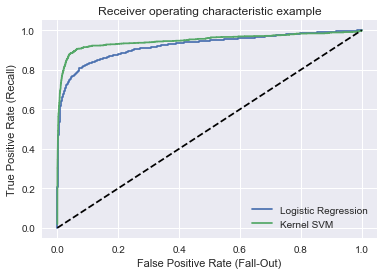

In [22]:
plt.plot(fpr1, tpr1, label="Logistic Regression")
plt.plot(fpr2, tpr2, label="Kernel SVM")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

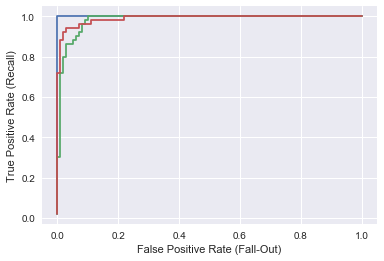

In [30]:
#다중클래스 : 각각의 클래스에 대해 OvR문제를 가정, ROC커브를 그린다.
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize

iris = load_iris()
X = iris.data
y = label_binarize(iris.target, [0,1,2])
#0,1,2의 클래스 라벨을 biarize (1) 로 바꾸고 행렬형태로 만들어줌. (OvR적용하기 위해)

fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

for i in range(3):
    model = GaussianNB().fit(X,y[:,i]) #각각의 클래스들로 하나씩 모델 생성
    fpr[i], tpr[i], thr[i] = roc_curve(y[:, i], model.predict_proba(X)[:,1])
    plt.plot(fpr[i], tpr[i])
    
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.show()

In [31]:
# AUC (Area Under the Curve)

from sklearn.metrics import auc
auc(fpr1, tpr1), auc(fpr2, tpr2)

(0.9227893798140808, 0.9486320784707581)